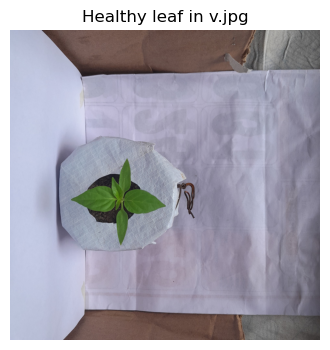

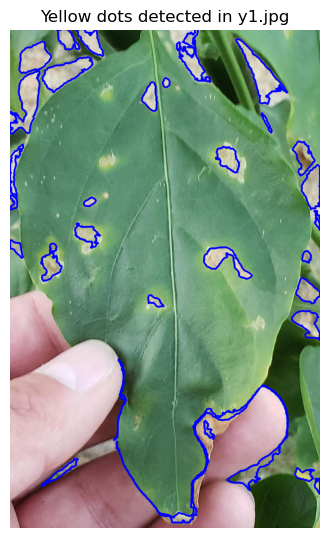

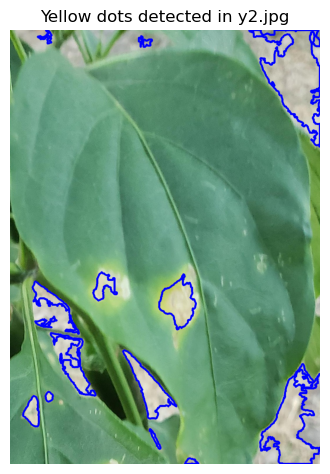

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Folder containing the images
folder_path = 'yellow_leaf_pics'  

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Define minimum area for yellow spots to ignore small areas
min_area = 500  # You can adjust this value based on your image and required size

# Loop through each image file in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    
    # Read the image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Image {image_file} not found.")
        continue

    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Define HSV range for yellow spots
    lower_yellow = np.array([20, 20, 20])  # Lighter yellow 
    upper_yellow = np.array([35, 255, 255])  # Darker yellow 
    
    # Create mask for yellow areas 
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    
    # Find contours of yellow spots
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by area
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    
    # Check if any significant yellow spots were found
    if len(filtered_contours) == 0:
        title_text = "Healthy leaf"
    else:
        title_text = "Yellow dots detected"
    
    # Draw contours around significant yellow spots
    result = img.copy()
    cv2.drawContours(result, filtered_contours, -1, (255, 0, 0), 5)
    
    # Display the result using matplotlib
    plt.figure(figsize=(4, 8))  # Set figure size
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
    plt.title(f"{title_text} in {image_file}")
    plt.axis('off')
    
    plt.show()
